# Estudo de caso sobre bicicletas alugadas em Seul - Coreia do Sul

Os dados foram coletados durante os anos de 2017 e 2018. Consistem em informações sobre o clima e data. O objetivo é prever a quantidade de bicicletas que serão alugadas nas condições propostas.

Os dados podem ser obtidos em: <https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand>

---

**Citações**

[1] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[2] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020

[3] Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020


## Resumo
* Importando as principais bibliotecas
* Importando o conjunto de dados
* Análise Exploratória
* Criação de Variáveis
* Pré-processamento de dados
* Divisão dos dados entre treino e teste
* Modelo (XGBoost)
* Predição nos dados de treino
* Predição nos dados de teste
* Performance do modelo nos dados de teste
* Impacto das variáveis no modelo
* Realizando uma predição

## Importando as principais bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_theme(style="darkgrid")

## Importando o conjunto de dados

In [2]:
dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', 
    encoding='ISO-8859-1')

In [3]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Análise Exploratória

### Há valores nulos?

In [4]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Resumo dos dados

In [5]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Histogramas das variáveis numéricas

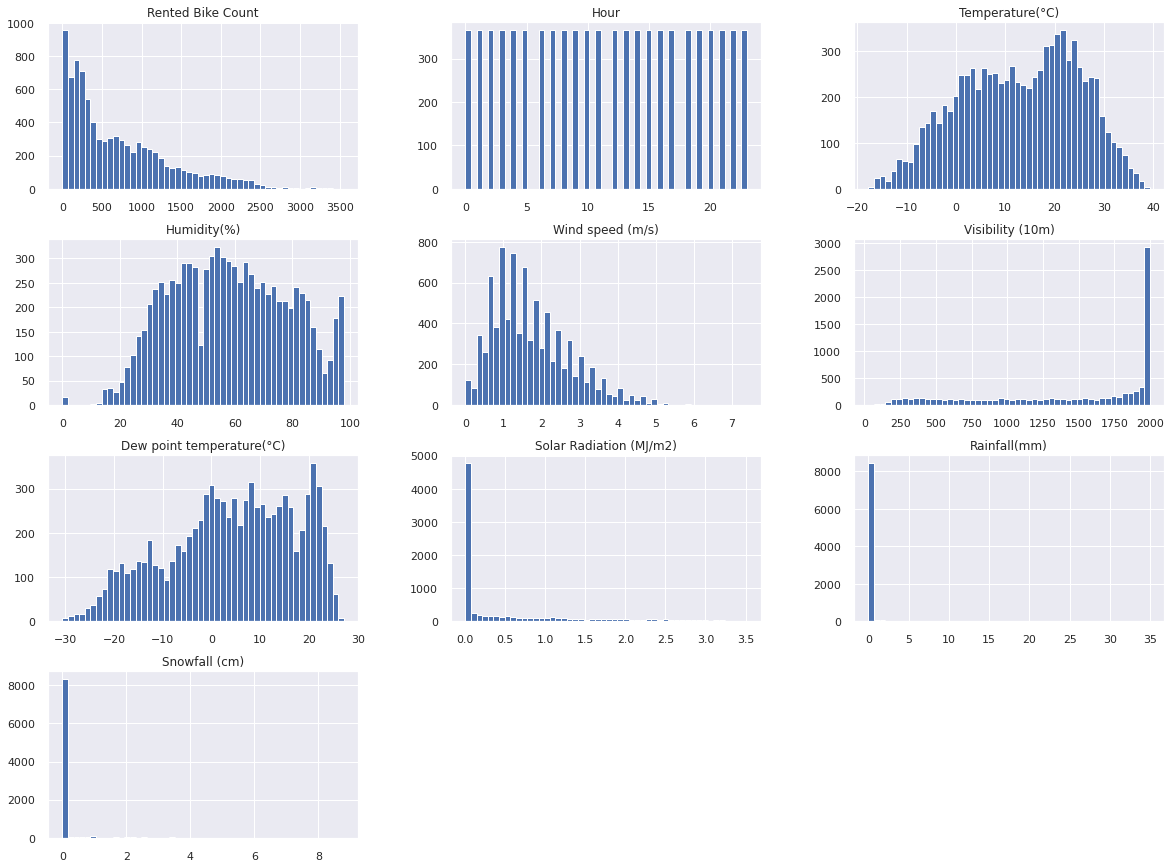

In [6]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

### Correlações das variáveis numéricas

<ipython-input-7-1b51de9efbe1>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dt_mask = np.zeros_like(dt_corr, dtype=np.bool)


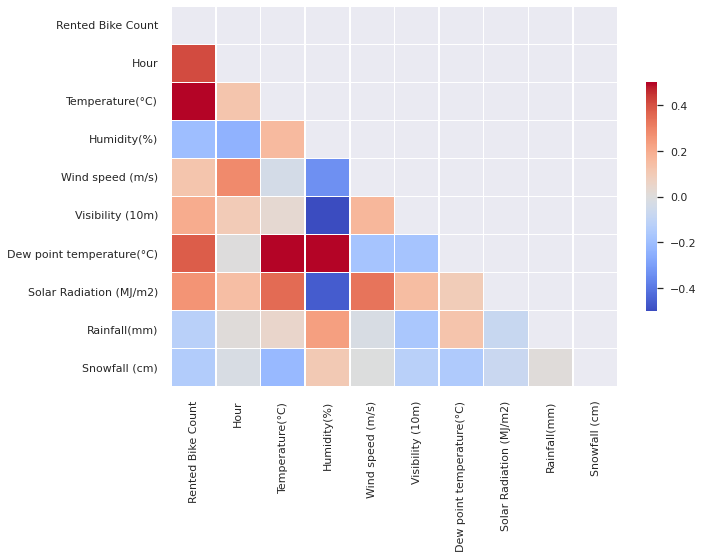

In [7]:
dt_corr = dataset.corr()
dt_mask = np.zeros_like(dt_corr, dtype=np.bool)
dt_mask[np.triu_indices_from(dt_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(dt_corr, mask=dt_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

Alta correlação entre a quantidade de bicicletas alugadas e a temperatura. Pouca correlação entre precipitação e neve com as demais variáveis.


### Bicicletas alugadas por hora

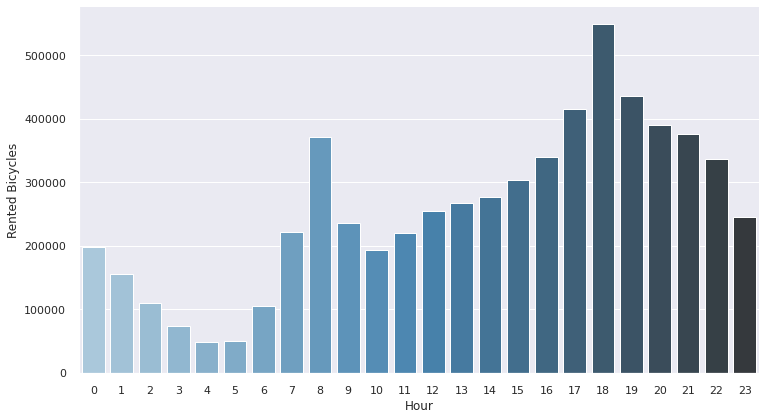

In [8]:
hour = pd.DataFrame({'Hour': [i for i in range(24)], 
                     'Rented Bicycles': dataset.groupby('Hour').sum()['Rented Bike Count']})

sns.catplot(x='Hour', y='Rented Bicycles', kind='bar', data=hour, height=6, aspect=1.8, 
    palette='Blues_d', ci=None)

Há picos às 8h e 18h. Uma causa provável é o início e fim do horário comercial, em que muitas pessoas utilizam bicicletas para se locomover até o trabalho.

### Bicicletas alugadas por temperatura

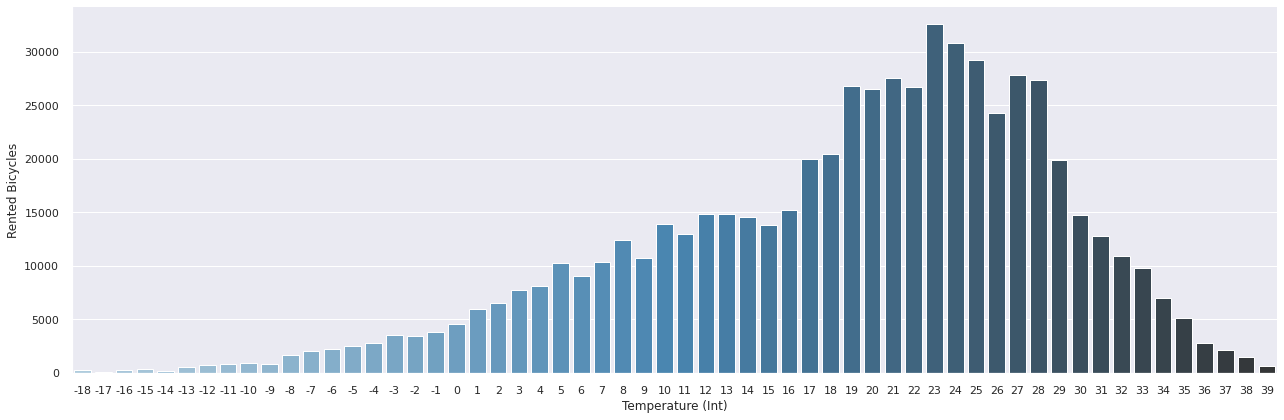

In [9]:
temperature = pd.DataFrame({'Temperature': dataset.groupby('Temperature(°C)').sum()['Rented Bike Count'].index, 
                            'Rented Bicycles': dataset.groupby('Temperature(°C)').sum()['Rented Bike Count'].values})

temperature['Temperature (Int)'] = temperature.Temperature.map(lambda t: round(t))

sns.catplot(x='Temperature (Int)', y='Rented Bicycles', kind='bar', data=temperature, height=6, aspect=3, 
    palette='Blues_d', ci=None)

Entre os 19 °C e 28 °C está a maior parte dos aluguéis, sendo realmente a faixa de temperatura mais agradável para a prática de atividades ao ar livre.

### Bicicletas alugadas por estação

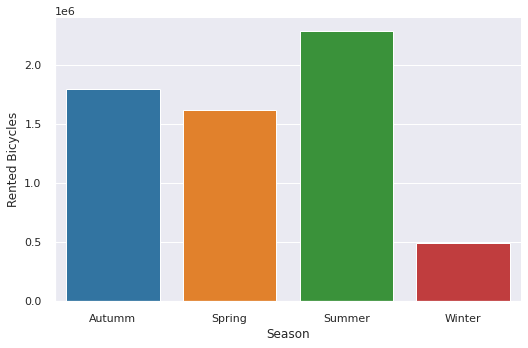

In [10]:
labels = ['Autumm', 'Spring', 'Summer', 'Winter']
season = pd.DataFrame({'Season': labels, 
                       'Rented Bicycles': dataset.groupby('Seasons').sum()['Rented Bike Count']})

sns.catplot(x='Season', y='Rented Bicycles', kind='bar', data=season, height=5, 
            aspect=1.5, ci=None, palette=sns.color_palette("tab10"))

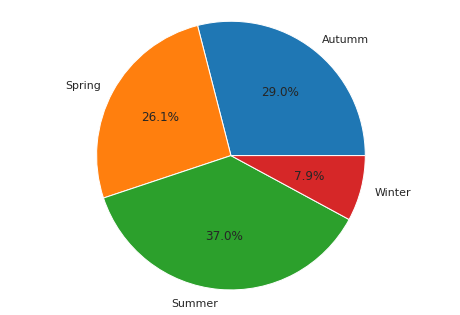

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(dataset.groupby('Seasons').sum()['Rented Bike Count'], 
        labels=labels, autopct='%1.1f%%', colors=sns.color_palette("tab10"))
ax1.axis('equal')
plt.show()

No verão ocorre a maior prevalência das locações. Em seguida temos o outono e a primavera (com pouca diferença entre si) e o inverno.

### Quantidade média de bicicletas alugadas em feriados / dias úteis

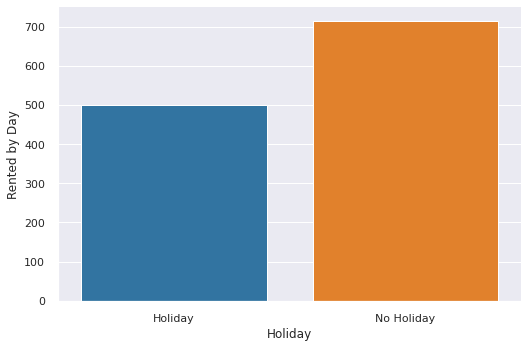

In [12]:
labels = ['Holiday', 'No Holiday']
holiday = pd.DataFrame({'Holiday': labels, 
                       'Rented Bicycles': dataset.groupby('Holiday').sum()['Rented Bike Count'],
                       'Num Days': dataset.groupby('Holiday').count()['Rented Bike Count']})

holiday['Rented by Day'] = holiday['Rented Bicycles'] / holiday['Num Days']

sns.catplot(x='Holiday', y='Rented by Day', kind='bar', data=holiday, height=5, 
            aspect=1.5, ci=None, palette=sns.color_palette("tab10"))

Observa-se que há mais locações (em média) em dias úteis, confirmando a hipótese da utilização de bicicletas para locomoção até o trabalho.

## Criação de Variáveis

### Variáveis Temporais

In [13]:
# extracao do ano
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year

In [14]:
# extracao do mes 
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).day

In [15]:
# extracao do dia
dataset['Day'] = pd.DatetimeIndex(dataset['Date']).month

In [16]:
dataset.drop('Date', axis=1, inplace=True)

### Variáveis Tranformação Raiz Cúbica

Tem como objetivo alterar a distribuição das colunas com valores muito parecidos. Isso dará ao modelo pontes de corte mais representativos para detecção dos padrões

In [17]:
dataset['cbrt_snowfall'] = np.cbrt(dataset['Snowfall (cm)'])
dataset['cbrt_rainfall'] = np.cbrt(dataset['Rainfall(mm)'])
dataset['cbrt_visibility'] = np.cbrt(dataset['Visibility (10m)'])
dataset['cbrt_solar_rad'] = np.cbrt(dataset['Solar Radiation (MJ/m2)'])

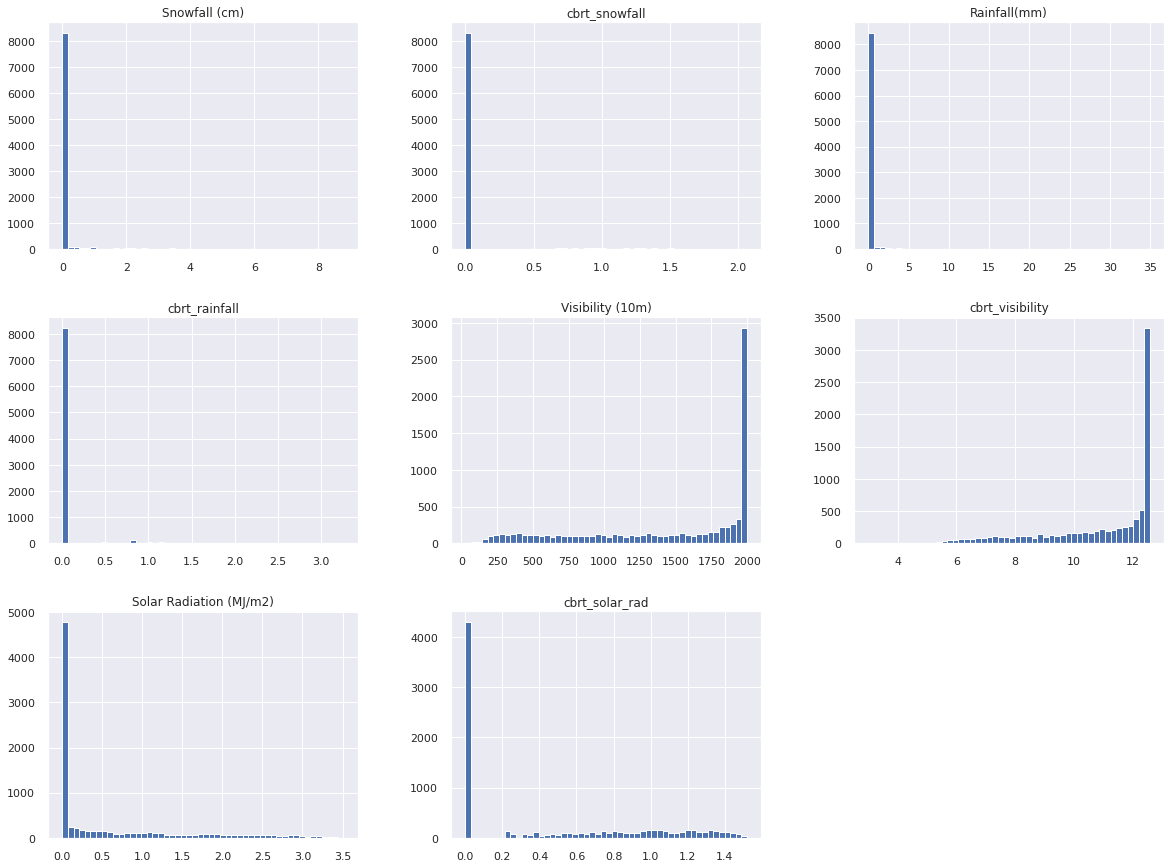

In [18]:
columns = [
    'Snowfall (cm)', 'cbrt_snowfall', 'Rainfall(mm)', 'cbrt_rainfall', 'Visibility (10m)', 
    'cbrt_visibility', 'Solar Radiation (MJ/m2)', 'cbrt_solar_rad'
]

dataset[columns].hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
dataset.drop(
    ['Snowfall (cm)', 'Rainfall(mm)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)'], 
    axis=1, 
    inplace=True
)

## Pré-processamento de dados

In [20]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# conversao das estacoes de texto para numero
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
# tratamento dos feriados / dias uteis
le = LabelEncoder()
X[:, 9] = le.fit_transform(X[:, 9])

In [23]:
# tratamento dos dias de funcionamento
X[:, 10] = le.fit_transform(X[:, 10])

## Divisão dos dados entre treino e teste

In [24]:
# como os dados seguem uma serie temporal, dividiu-se o conjunto de treino
# no 70% inicial e o de teste no 30% final

SPLIT = 0.7

X_train = X[:int(X.shape[0] * SPLIT)]
X_test = X[int(X.shape[0] * SPLIT):]
y_train = y[:int(X.shape[0] * SPLIT)]
y_test = y[int(X.shape[0] * SPLIT):]

## Modelo (XGBoost) 

In [25]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.7 MB/s 


In [26]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor


SPLIT = 0.7

X_train_2 = X_train[:int(X_train.shape[0] * SPLIT)]
X_val = X_train[int(X_train.shape[0] * SPLIT):]
y_train_2 = y_train[:int(X_train.shape[0] * SPLIT)]
y_val = y_train[int(X_train.shape[0] * SPLIT):]


def tune_xgb(params):

    n_estimators, learning_rate, max_depth, subsample = params

    mdl = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate, 
        max_depth=max_depth,
        subsample=subsample,
        random_state=0
    )

    mdl.fit(X_train_2, y_train_2)
    y_pred = mdl.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    print("\nModel Result:\n\tParams: {}\n\tMAE: {}\n".format(str(params), str(mae)))
    
    return mae

In [27]:
params = {
    'seed': 0,                                                    # semente aleatoria. Definida para tornar os resultados reproduziveis
    'verbose': True,                                              # opcao para visualizar os detalhes do treinamento
    'n_calls_tuning': 20,                                         # numero de chamadas do otimizador bayesiano
    'mdl_params':                                                 # paramentros de otimizacao do modelo
        [
            (500, 1000),                                                 
            (1e-3, 1e-2, 'log-uniform'),
            (3, 5),
            (.3, 1)
        ]                                             
} 

In [28]:
from skopt import gp_minimize
res_mdl = gp_minimize(
    tune_xgb, 
    params['mdl_params'], 
    random_state=params['seed'], 
    verbose=params['verbose'], 
    n_calls=params['n_calls_tuning']
)

Iteration No: 1 started. Evaluating function at random point.
[20:02:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model Result:
	Params: [796, 0.006986597893216493, 5, 0.893076217148888]
	MAE: 325.1946977408036

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 4.2595
Function value obtained: 325.1947
Current minimum: 325.1947
Iteration No: 2 started. Evaluating function at random point.
[20:02:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model Result:
	Params: [812, 0.002423157857285798, 4, 0.3396990841222102]
	MAE: 371.84069450212564

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.6786
Function value obtained: 371.8407
Current minimum: 325.1947
Iteration No: 3 started. Evaluating function at random point.
[20:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depr

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Model Result:
	Params: [1000, 0.01, 5, 0.3]
	MAE: 318.2177609938642

Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 5.3499
Function value obtained: 318.2178
Current minimum: 318.2178
Iteration No: 17 started. Searching for the next optimal point.
[20:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Model Result:
	Params: [1000, 0.01, 5, 0.3]
	MAE: 318.2177609938642

Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 5.1621
Function value obtained: 318.2178
Current minimum: 318.2178
Iteration No: 18 started. Searching for the next optimal point.
[20:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Model Result:
	Params: [1000, 0.01, 5, 0.3]
	MAE: 318.2177609938642

Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 5.2462
Function value obtained: 318.2178
Current minimum: 318.2178
Iteration No: 19 started. Searching for the next optimal point.
[20:03:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Model Result:
	Params: [1000, 0.01, 5, 0.3]
	MAE: 318.2177609938642

Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 5.1973
Function value obtained: 318.2178
Current minimum: 318.2178
Iteration No: 20 started. Searching for the next optimal point.
[20:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Model Result:
	Params: [1000, 0.01, 5, 0.3]
	MAE: 318.2177609938642

Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 5.0891
Function value obtained: 318.2178
Current minimum: 318.2178


In [29]:
print("Best params: {}".format(res_mdl.x))

Best params: [1000, 0.01, 5, 0.3]


## Predição nos dados de teste

In [30]:
n_estimators, learning_rate, max_depth, subsample = res_mdl.x

final_model = XGBRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate, 
    max_depth=max_depth,
    subsample=subsample,
    random_state=0
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

[20:03:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Performance do modelo nos dados de teste

### Erro Médio Absoluto

In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

263.76563439263055


### Erro Quadrático Médio

In [32]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

375.156774515896


Grande diferença do erro médio absoluto entre os dados de treino e teste.

Aparentemente o modelo está apresentando overfitting.

Visando solucionar isso tentou-se modelos mais simples (regressão linear e SVR) mas, após testes, apresentaram resultados piores.

Outra abordagem é o aumento do volume de dados (o dataset atual possui 8760 registros).

Observo que, ao remover variáveis (precipitação e queda de neve) que possuem pouca relação com os demais atributos, o modelo apresentou leve piora.

Outro ponto interessante é que, com a remoção de outliers, o modelo piorou. Creio que alguns desses registros ajudam o modelo a abstrair melhor.

## Impacto das variáveis no modelo

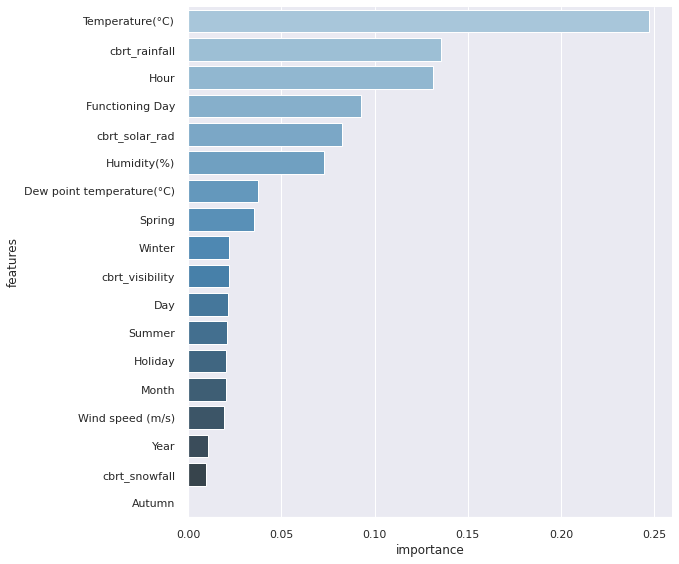

In [33]:
features = [
    'Autumn', 'Spring','Summer','Winter', 'Hour', 'Temperature(°C)', 'Humidity(%)',
    'Wind speed (m/s)', 'Dew point temperature(°C)',
    'Holiday', 'Functioning Day', 'Year', 'Month', 'Day',
    'cbrt_snowfall', 'cbrt_rainfall', 'cbrt_visibility', 'cbrt_solar_rad'
]

feature_importance = pd.DataFrame({'features': features, 
                                   'importance':final_model.feature_importances_})

feature_importance = feature_importance.sort_values('importance', ascending=False)

sns.catplot(x='importance', y='features', kind='bar', data=feature_importance, height=8, 
            aspect=1.2,  palette='Blues_d', ci=None)

O modelo considera a temperatura a principal variável para predição. Radiação solar, hora e precipitação também são relevantes, o que realmente faz sentido pois estão entre os pricipais fatores a serem considerados na prática de atividades ao ar livre.

## Realizando uma predição

**Valores de entrada:**

1. Estação: outono
1. Hora: 7:00
1. Temperatura (° C): 5
1. Umidade (%): 20
1. Velocidade do vento (m / s): 0.3
1. Visibilidade (m): 1900
1. Temperatura do ponto de orvalho (° C): -5
1. Radiação solar (MJ / m2): 0.2
1. Precipitação (mm): 0
1. Queda de neve (cm): 0
1. Feriado: não
1. Dia de funcionamento: sim
1. Ano: 2018
1. Mes: novembro
1. Dia: 5



In [34]:
pred = [1,0,0,0,7,5,20,0.3,-5,1,1,2018,11,5, np.cbrt(0), np.cbrt(0), np.cbrt(1900), np.cbrt(0.2)]
print(final_model.predict([pred]))

[568.02814]
